<a href="https://colab.research.google.com/github/Mansi2001/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install ipython-autotime
%load_ext autotime

time: 142 µs (started: 2021-04-29 15:32:44 +00:00)


Step1- Data Gathering


In [ ]:
# Data: Images 
# 1. Download manually the images from google
# 2. Download dataset from kaggle.com
# 3. Build a Image Web Crawler
# 4. Use Python libraries to scrape the images (Bing Image Downloader)

In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://cdn-0.preppywallpapers.com/wp-content/uploads/2019/08/Sunflower-iPhone-Wallpaper-5.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/736x/0e/b5/63/0eb5635680546f8bb7bc618ad0e55489.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://66.media.tumblr.com/44d35612a2a7601c2f8c8d35cf820193/tumblr_nqalbc4ywM1rwrn5zo1_500.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.tattoosforyou.org/wp-content/uploads/2016/03/Dainty-Tattoos.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.tattoosbag.com/wp-content/uploads/2016/08/Sunflower-Tattoo-On-Back-TB166.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/736x/0b/42/9f/0b429f77b547385793a5f221c8f33b9c.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.saphireeventgroup.com/wp-content/uploads/files/6314/0916/2507/colorful_bridal_bouqu

In [5]:
downloader.download("rugby ball leather",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://cdn.shopify.com/s/files/1/0788/5979/products/mvp-leather-balls-heritage-leather-rugby-ball-2_1024x1024.jpg?v=1550134680
[%] File Downloaded !

[%] Downloading Image #2 from https://img1.etsystatic.com/044/0/7864717/il_fullxfull.644349439_g0x6.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://static.vecteezy.com/system/resources/previews/000/111/555/original/hand-drawn-leather-football-vector-texture.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.john-woodbridge.com/1009-large_default/1930s-football.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://sc02.alicdn.com/kf/U4fbecee4121e4b7b8cf9acca310b2054f/1096099/U4fbecee4121e4b7b8cf9acca310b2054f.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://res.freestockphotos.biz/pictures/17/17113-illustration-of-a-football-pv.png
[%] File Downloaded !

[%] Downloading Image #7 from http://

In [6]:
downloader.download("ice cream cone",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://townsquare.media/site/942/files/2018/07/Ice-Cream-Cone-TSM.jpg?w=1200&amp;h=0&amp;zc=1&amp;s=0&amp;a=t&amp;q=89
[%] File Downloaded !

[%] Downloading Image #2 from https://the-glass-co.com/wp-content/uploads/2016/10/ice-cream-presentation.gif
[%] File Downloaded !

[%] Downloading Image #3 from https://c8.alamy.com/comp/EH73TT/a-big-ice-cream-cone-banner-on-display-outside-a-gelateria-rome-italy-EH73TT.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://geekologie.com/2017/04/26/black-soft-serve-ice-cream-5.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://d28mt5n9lkji5m.cloudfront.net/i/W4DviZ0U8k.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.roadsideamerica.com/attract/images/mo/MOAFFicecream_laura.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.roadsideamerica.com/attract/images/il/ILMARicecreamcone_perfectpair.jpg


In [9]:
import numpy as np 
a= np.array([[1,2,3,4,5],
            [4,5,6,7,8]])
a.ndim

2

time: 6.82 ms (started: 2021-04-29 15:50:10 +00:00)


In [10]:
#How do i convert Matrix to Vector? -flatten()   #One of the preprocessing technique
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 10.2 ms (started: 2021-04-29 15:51:27 +00:00)


Step2- Preprocessing: (i) RESIZE
                     (ii) FLATTEN

In [19]:
import os #To play around with the folders. I need this!
import matplotlib.pyplot as plt #For displaying the image
import numpy as np  #For some numerical computing
from skimage.io import imread  #For reading an image 
from skimage.transform import resize #To resize all images

target = []  #output
images = []  #data
flat_data = [] #helps to create fast ML Model

DATADIR = '/content/images'   #My data directory path
CATEGORIES = ['pretty sunflower','rugby ball leather','ice cream cone']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)  #Label Encoding the values
  path = os.path.join(DATADIR,category)   #Create path to use all the images
  for img in os.listdir(path):
   img_array = imread(os.path.join(path,img))
   #print(img_array.shape)    
   #plt.imshow(img_array)
   #break         #only last image will be displayed then
   img_resized = resize(img_array,(150,150,3))   #Normalizes the value from 0 to 1
   flat_data.append(img_resized.flatten())
   images.append(img_resized)
   target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 11.8 s (started: 2021-04-29 16:26:19 +00:00)


In [20]:
flat_data[0]

array([0.87843137, 0.85098039, 0.80784314, ..., 0.77777778, 0.53660131,
       0.21437908])

time: 5.88 ms (started: 2021-04-29 16:27:37 +00:00)


In [21]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 5.73 ms (started: 2021-04-29 16:29:15 +00:00)


<BarContainer object of 3 artists>

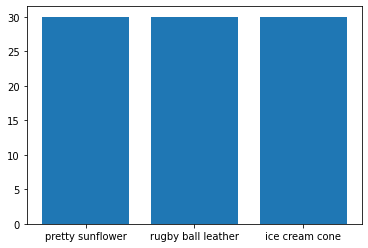

time: 196 ms (started: 2021-04-29 16:31:47 +00:00)


In [24]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [25]:
#Spilt data into TRAINING and TESTING
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=109)

time: 27.2 ms (started: 2021-04-29 16:37:15 +00:00)


In [26]:
#helps in making sure that the parameters which are used in support vectors are proper. 
from sklearn.model_selection import GridSearchCV
from sklearn import svm   #Using SVM Model (Classification Algorithm)
param_grid = [ {'C':[1,100,1000],'kernel':['linear']},
              {'C':[1,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 52.5 s (started: 2021-04-29 16:56:13 +00:00)


In [27]:
y_pred = clf.predict(x_test)
y_pred


array([2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 2])

time: 92.6 ms (started: 2021-04-29 16:59:07 +00:00)


In [28]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 4.07 ms (started: 2021-04-29 16:59:25 +00:00)


In [30]:
#Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.34 ms (started: 2021-04-29 17:01:14 +00:00)


In [31]:
accuracy_score(y_pred,y_test)

0.8888888888888888

time: 14.8 ms (started: 2021-04-29 17:01:50 +00:00)


In [32]:
confusion_matrix(y_pred,y_test)

array([[8, 0, 0],
       [0, 8, 0],
       [0, 3, 8]])

time: 6.93 ms (started: 2021-04-29 17:02:42 +00:00)


In [34]:
#to check our output 
#Save the model using Pickle library for deployment
import pickle
pickle.dump(clf,open('img_model.p','wb'))  #writing the byte

time: 29.3 ms (started: 2021-04-29 17:07:42 +00:00)


In [36]:
model = pickle.load(open('img_model.p','rb'))  #reading the byte

time: 26.6 ms (started: 2021-04-29 17:10:22 +00:00)


Enter your URLhttps://5.imimg.com/data5/PO/XI/MY-37095433/rugby-ball-500x500.jpg
(500, 500, 3)
PREDICTED OUTPUT: rugby ball leather


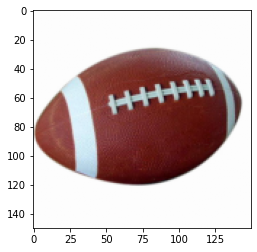

time: 14.6 s (started: 2021-04-29 17:24:39 +00:00)


In [42]:
#Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')